# Step 0: Load necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

###  Step 1: Load the Dataset

We will use the **Adult Income dataset** from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/adult).  
This dataset is used to predict whether a person earns more than \$50K a year based on their demographic information.

The dataset includes:
- A **training set** (`adult.data`)
- A **test set** (`adult.test`)

Then do the following:
1. Use `.shape` to check how many rows and columns the dataset has.
2. Use `.head()` to display the first few rows of the dataset.

In [ ]:
import pandas as pd

# URL of the training data
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Column names
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Load the training dataset
df_train = pd.read_csv(
    train_url,
    header=None,
    names=columns,
    na_values='?',
    skipinitialspace=True
)

print("Training set shape:", df_train.shape)
df_train.head()


Training set shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Step 2: Load and Clean the Test Dataset

The test dataset is very similar to the training dataset but has:
- A header row that we should skip
- `income` labels that include a period at the end, like `>50K.`

We will:
- Load the data
- Use the same column names
- Clean the `income` column by removing periods and extra spaces


In [ ]:
# URL of the test data
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Load the test dataset
df_test = pd.read_csv(
    test_url,
    header=None,
    names=columns,
    skiprows=1,            # Skip header line with text
    na_values='?',
    skipinitialspace=True
)

print("Test set shape:", df_test.shape)
df_test.head()


Test set shape: (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.



You might see that `.head()` shows **2 unique values** in both the training and test sets for the `income` column.  

But are those labels *exactly the same* in both datasets?

Let’s check more closely:

```python
print("Train labels:", df_train['income'].unique())
print("Test labels:", df_test['income'].unique())
```

Take a careful look at the test labels — is there an extra character at the end?

---

###  Why This Matters

This tiny difference (a period `"."` at the end) might not look like a big deal, but it actually means the test labels are **different strings**.  
If we don’t fix this, your model could get confused — it might think `'>50K'` and `'>50K.'` are two different classes!

Even though your code might still run, your **accuracy will be wrong** if the labels don’t match.

---

###  Fix it!

Can you figure out how to **clean the labels** so the train and test values match?



In [ ]:
print("Train labels:", df_train['income'].unique())
print("Test labels:", df_test['income'].unique())

Train labels: ['<=50K' '>50K']
Test labels: ['<=50K.' '>50K.']


In [ ]:

# Clean the income column
df_test['income'] = df_test['income'].str.strip().str.replace('.', '', regex=False)



# Step 3: Explore the Dataset

Now that we've loaded the dataset, it's time to explore it!
<br/>
In Data Science, Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics—often using statistical graphics, plots, and other visualization tools.
<br/>
<br/>
EDA typically involves two main parts:
- Numerical statistics
- Visual analysis


## Numerical statistics

First, we’ll try to get some basic numerical insights from the dataset
<br/>
We’ll use:
- `describe` -- to get statistics like mean, standard deviation, min, max, and quartiles for the numerical features.
- `info` --  to get an overview of the dataset structure, including feature names, data types, non-null counts, and memory usage.
- `head(n)` – shows the first n rows of the dataset (default is 5). Great for a quick glance at the data.

- `shape` – returns a tuple showing the number of rows and columns.

- `value_counts()` – shows frequency counts for unique values in a column (great for categorical data).

- `isnull().sum()` – helps identify missing values per column.

- `duplicated().sum()` – shows total number of duplicated values.

In [ ]:
# Basic statistics for numerical columns
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# You can see from the results the data types of each feature, a brief memory usage report, total number of data columns, and the number of rows in the dataset:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
print("Shape of the dataset:", df_train.shape)

Shape of the dataset: (32561, 15)


### Check for Missing Values

In [ ]:
# Calculating missing values (as percentages) for each column:

# Replace "?" with actual missing values (NA)
df_train = df_train.replace("?", pd.NA)
df_test = df_test.replace("?", pd.NA)

for col in df_train.columns:
    percent_missing = round((df_train[col].isnull().sum() / len(df_train)) * 100, 2)
    print(f"{col}: {percent_missing}%")

age: 0.0%
workclass: 5.64%
fnlwgt: 0.0%
education: 0.0%
education-num: 0.0%
marital-status: 0.0%
occupation: 5.66%
relationship: 0.0%
race: 0.0%
sex: 0.0%
capital-gain: 0.0%
capital-loss: 0.0%
hours-per-week: 0.0%
native-country: 1.79%
income: 0.0%


### Check for Duplicates

In [ ]:
# Calculating total duplicates in the dataset:
total_duplicates = df_train.duplicated().sum()
print(f"Total duplicates in train dataset: {total_duplicates}")

# Drop duplicates
df_train = df_train.drop_duplicates()
print("New shape after dropping duplicates:", df_train.shape)

Total duplicates in train dataset: 24
New shape after dropping duplicates: (32537, 15)


## Visual analysis

The first step in visual analysis is to explore the distributions of features in the dataset. This helps us understand the shape of the data, detect outliers, and identify potential data quality issues or patterns.
<br/>
Common approaches include:
<br/>
- Bar plots – great for visualizing the distribution of categorical variables.

- Histograms – useful for showing the frequency distribution of numerical features.

- Box plots – helpful to spot outliers and understand the spread and skewness of data.

- Count plots – a variant of bar plots, often used with categorical data.

- KDE plots (Kernel Density Estimation) – smooth curves that estimate the probability distribution of a numerical variable.

- Pie charts – sometimes used for simple categorical distribution, though not always preferred.

### Visualizing the Target Variable


Since our target variable (`income`) is categorical, we can use a count plot to visualize its distribution. This helps us understand the class balance (e.g., whether the data is imbalanced):


<Axes: xlabel='income', ylabel='count'>

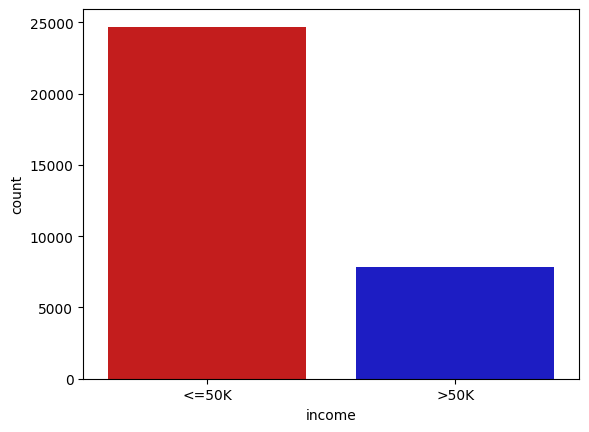

In [ ]:
colors = ["#DF0101", "#0101DF"]

sns.countplot(x="income", hue="income", data=df_train, palette=colors)

### Exploring Education Level Distribution


Now, let's check the distribution of education levels in the dataset. This gives us insight into the average persona or demographic represented in the data

---
Answer the following questions:
- What is the most earned degree among participants?
- Is there a connection between education level and income?


<Axes: xlabel='education', ylabel='Count'>

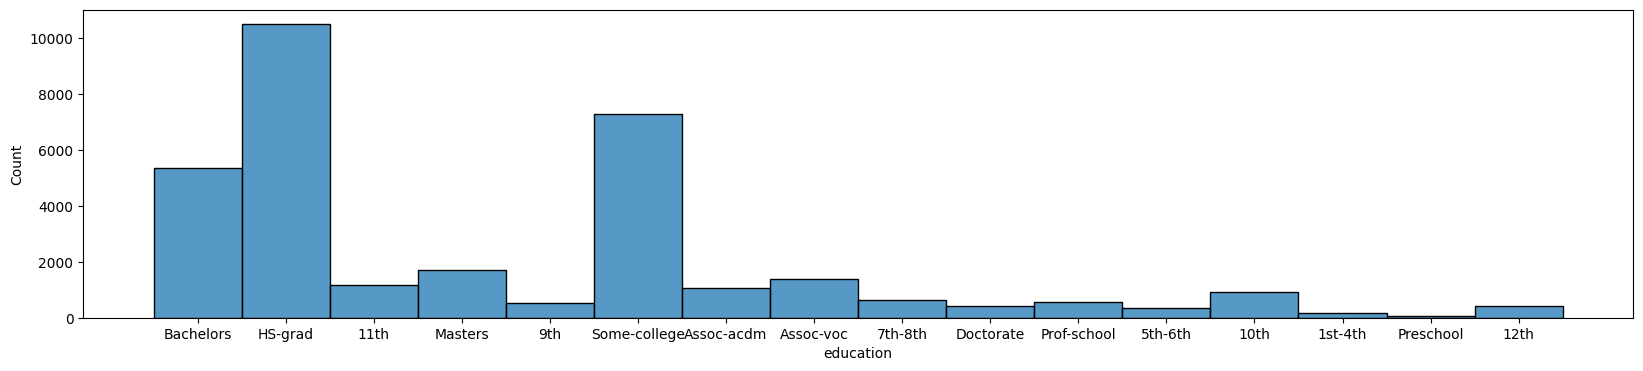

In [ ]:
"""
education-num is an ordinal numerical feature representing the order of education levels (e.g., 1 = Preschool, 16 = Doctorate).
We can use it to sort the education feature before plotting, ensuring the categories appear in meaningful order rather than alphabetically.
df_train = df_train.sort_values(by='education-num')
"""
# Sort the dataset based on education-num to respect the ordinal nature
df_sorted = df_train.sort_values(by='education-num')

f, axes = plt.subplots(ncols=1, figsize=(20,4))
sns.histplot(df_train["education"],ax=axes)

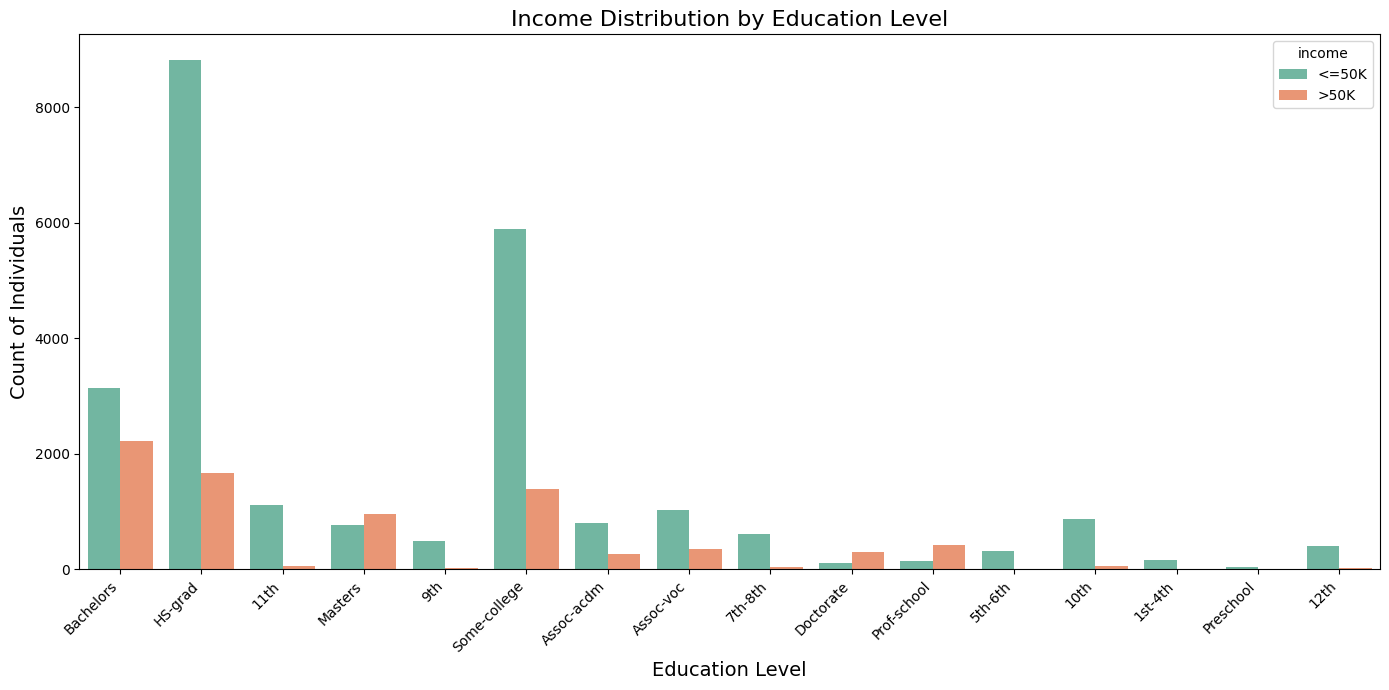

In [ ]:
"""
Most people in the dataset hold a high school diploma, but when we look at the income distribution,
it's clear that individuals with master's degrees or higher are more likely to earn above 50K.
"""

# Set the figure size for better readability
plt.figure(figsize=(14, 7))

# Create the count plot for education vs. income
sns.countplot(x='education', hue='income', data=df_train, palette='Set2')

# Set the plot title with more context
plt.title('Income Distribution by Education Level', fontsize=16)

# Set axis labels with more detail
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count of Individuals', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Tight layout for better space utilization
plt.tight_layout()

# Display the plot
plt.show()


### Exploring the Relationship Between Nationality and Income

Exploring the income distribution across different nationalities reveals trends in earnings. This analysis can highlight which nationalities are more likely to earn higher income, providing insights into the potential socio-economic factors associated with nationality in the dataset

---

Tasks:
- Plot Nationality Distribution
- Compare Nationality vs. Income
- Identify Dominant Nationality with Highest Income Proportion

#### Task 1: Plot Nationality Distribution

Visualize the distribution of nationalities in the dataset to understand the representation of individuals from different countries. This will help in assessing the relative population of each nationality before comparing their income distributions

<ipython-input-15-879ed5095fe6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='native-country', data=df_train, palette='Set2', order=sorted_nationalities)


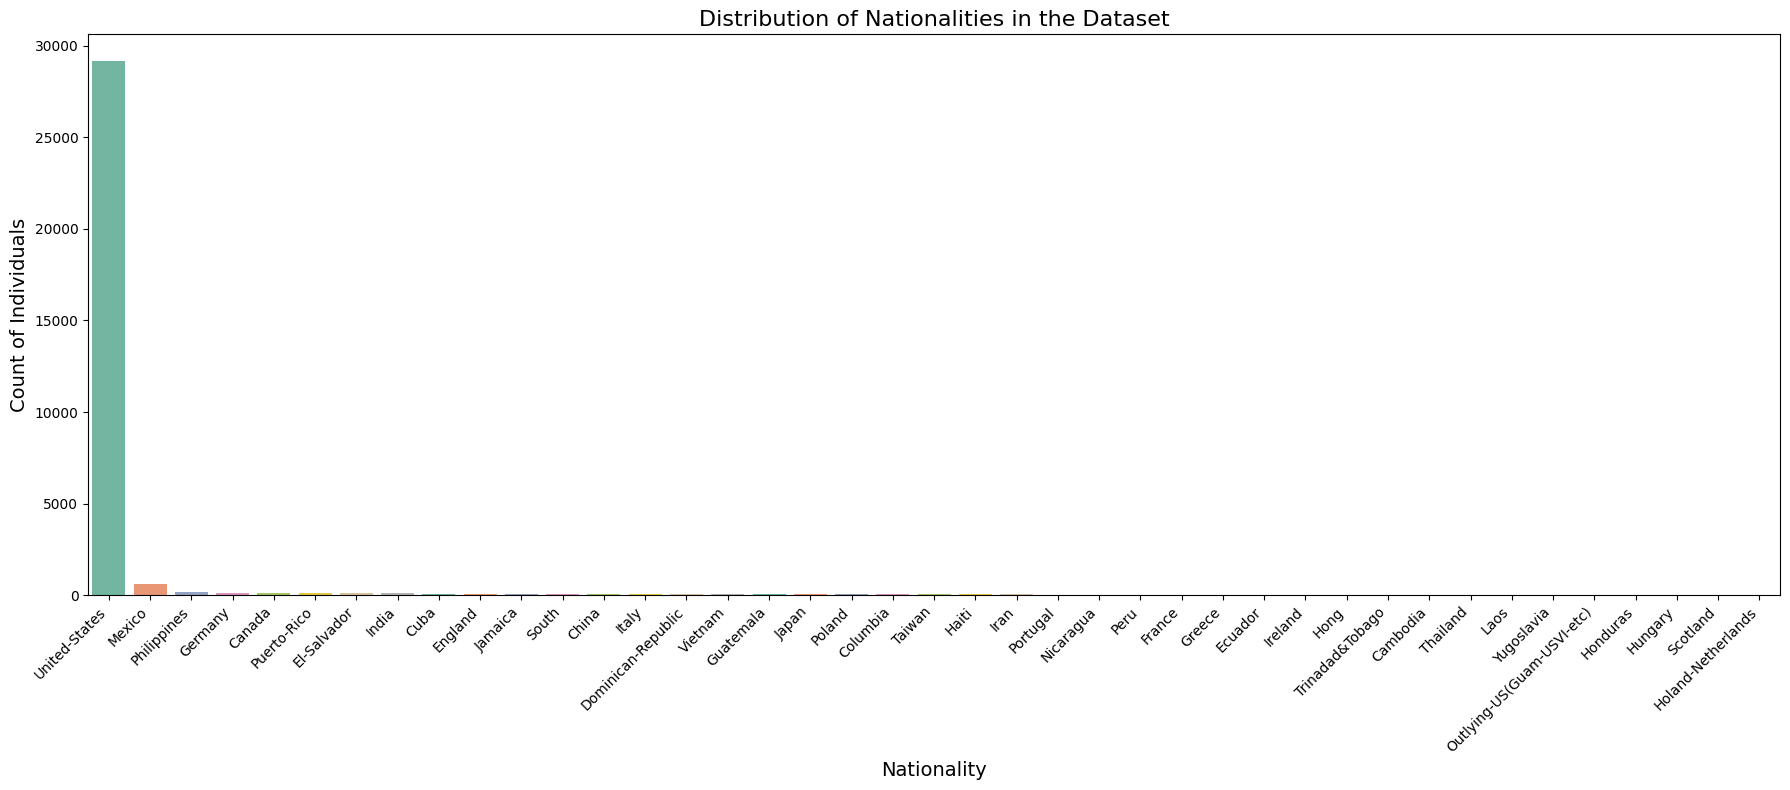

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the population proportion of each nationality
nationality_counts = df_train['native-country'].value_counts(normalize=True)

# Sort the nationalities based on the population proportion in descending order
sorted_nationalities = nationality_counts.index

# Set the figure size for better readability
plt.figure(figsize=(18, 8))

# Create a count plot for nationality distribution, sorted by population proportion
sns.countplot(x='native-country', data=df_train, palette='Set2', order=sorted_nationalities)

# Set the plot title
plt.title('Distribution of Nationalities in the Dataset', fontsize=16)

# Set axis labels
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Count of Individuals', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Tight layout for better space utilization
plt.tight_layout()

# Display the plot
plt.show()


#### Task 2: Compare Nationality vs. Income

Compare the income levels (`<=50K` and `>50K`) across different nationalities. This analysis will show how income distribution varies by nationality, helping to identify trends in income disparity among different nationalities.

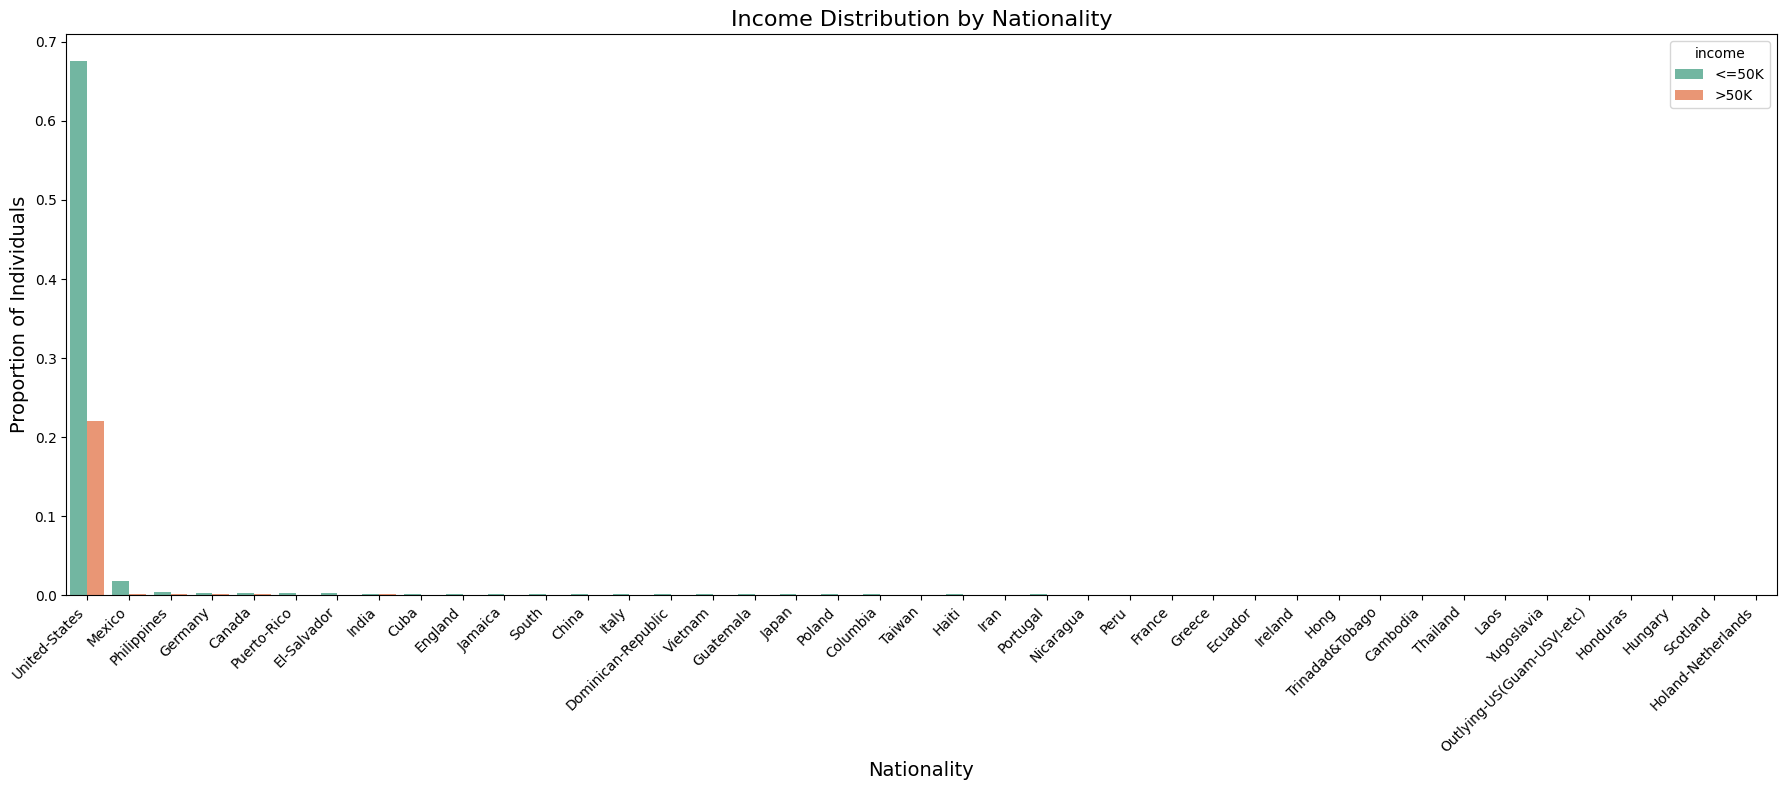

In [ ]:

# Calculate the population proportion of each nationality
nationality_counts = df_train['native-country'].value_counts(normalize=True)

# Sort the nationalities based on the population proportion in descending order
sorted_nationalities = nationality_counts.index

# Set the figure size for better readability
plt.figure(figsize=(18, 8))

# Create the count plot for nationality vs. income, sorted by population proportion
sns.countplot(x='native-country', hue='income', data=df_train, palette='Set2', hue_order=['<=50K', '>50K'], order=sorted_nationalities, stat='probability')

# Set the plot title
plt.title('Income Distribution by Nationality', fontsize=16)

# Set axis labels
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Proportion of Individuals', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Tight layout for better space utilization
plt.tight_layout()

# Display the plot
plt.show()

Filter out the dominant nationality (the one with the highest population proportion) and perform the analysis on the remaining nationalities. This will help focus on the income distribution across nationalities excluding the one with the most significant representation, offering a more nuanced view of the income distribution among less-represented nationalities.

---
Answer Following Questions:
- Which nationality is the second most populous in America, and what is their income distribution? What factors might explain these income patterns?

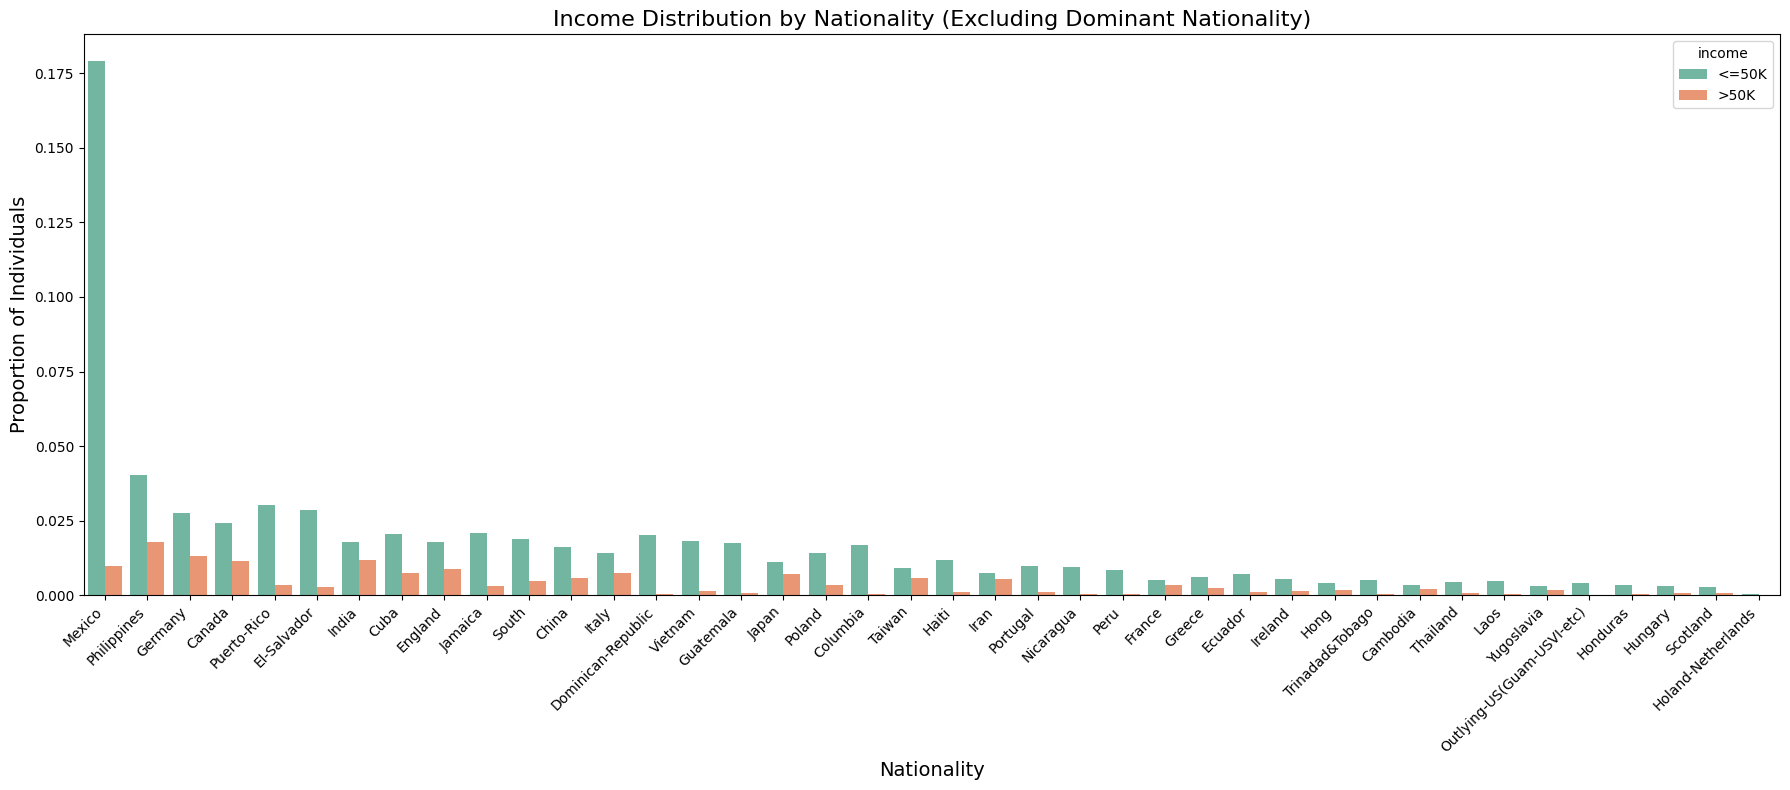

In [ ]:
# Step 1: Calculate the population proportion of each nationality
nationality_counts = df_train['native-country'].value_counts(normalize=True)

# Step 2: Identify the dominant nationality (the one with the highest population proportion)
dominant_nationality = nationality_counts.idxmax()

# Step 3: Filter out the dominant nationality from the dataset
df_train_filtered = df_train[df_train['native-country'] != dominant_nationality]

# Step 4: Calculate the population proportion of remaining nationalities
remaining_nationality_counts = df_train_filtered['native-country'].value_counts(normalize=True)

# Step 5: Sort the remaining nationalities by population proportion
sorted_remaining_nationalities = remaining_nationality_counts.index

# Step 6: Set the figure size for better readability
plt.figure(figsize=(18, 8))

# Step 7: Create the count plot for nationality vs. income, sorted by population proportion (excluding dominant nationality)
sns.countplot(x='native-country', hue='income', data=df_train_filtered, palette='Set2', hue_order=['<=50K', '>50K'], order=sorted_remaining_nationalities, stat='probability')

# Set the plot title
plt.title('Income Distribution by Nationality (Excluding Dominant Nationality)', fontsize=16)

# Set axis labels
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Proportion of Individuals', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Tight layout for better space utilization
plt.tight_layout()

# Display the plot
plt.show()


#### Task 3: Identify Dominant Nationality with Highest Income Proportion

Identify the nationality with the highest proportion of individuals earning more than 50K. This analysis helps highlight nationalities that are more likely to achieve higher earnings, providing insight into socio-economic patterns

---

Answer the folloiwng Questions:
- What is the nationality with the highest proportion of individuals earning more than 50K? can you explian that?

<ipython-input-18-85cd4f65b964>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_income_by_country.index, y=sorted_income_by_country.values, palette=colors)


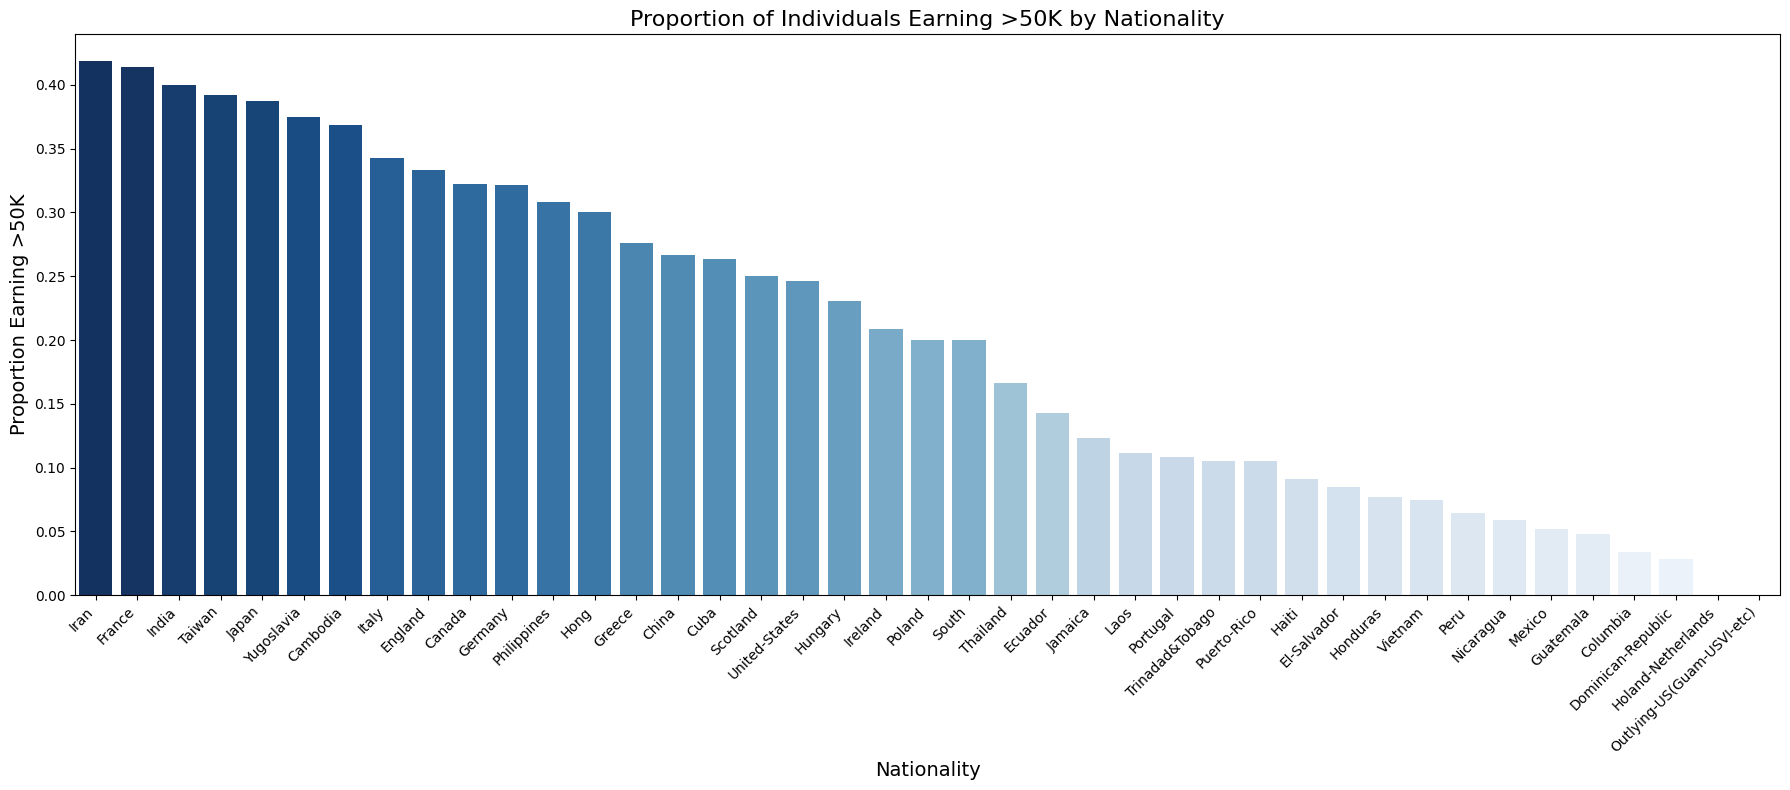

In [ ]:
# Calculate the proportion of individuals earning >50K by nationality
income_probabilities = df_train.groupby('native-country')['income'].value_counts(normalize=True).unstack().fillna(0)

# Sort the nationalities by the proportion of individuals earning >50K in descending order
sorted_income_by_country = income_probabilities['>50K'].sort_values(ascending=False)

# Normalize the values for color mapping (so that higher values get darker blues)
norm = mcolors.Normalize(vmin=sorted_income_by_country.min(), vmax=sorted_income_by_country.max())
cmap = plt.cm.Blues

# Create the color map for the barplot
colors = [cmap(norm(value)) for value in sorted_income_by_country.values]

# Set the figure size for better readability
plt.figure(figsize=(18, 8))

# Plot the sorted proportions with the custom colors
sns.barplot(x=sorted_income_by_country.index, y=sorted_income_by_country.values, palette=colors)

# Set the plot title
plt.title('Proportion of Individuals Earning >50K by Nationality', fontsize=16)

# Set axis labels
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Proportion Earning >50K', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Tight layout for better space utilization
plt.tight_layout()

# Display the plot
plt.show()


### Exploring Hours per Week Distribution

#### Task 1: Plot hours-per-week distribution
Plot KDE and histogram of hours-per-week and determine typical work hours.


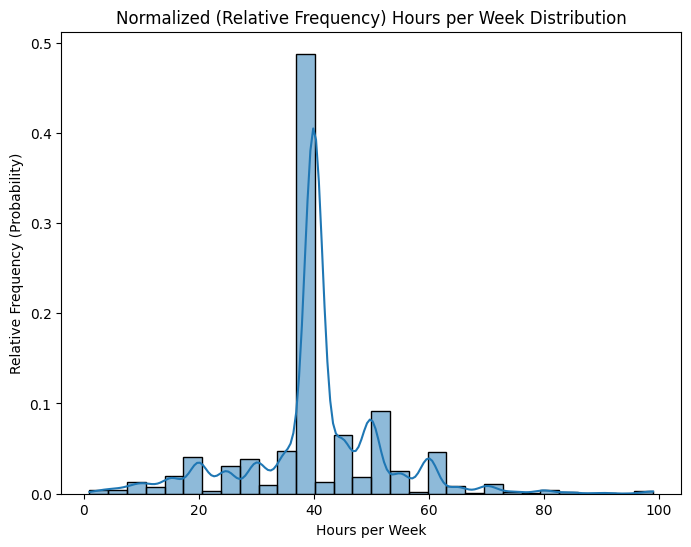

In [ ]:
# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_train['hours-per-week'], kde=True, bins=30, stat='probability')
plt.title("Normalized (Relative Frequency) Hours per Week Distribution")
plt.xlabel("Hours per Week")
plt.ylabel("Relative Frequency (Probability)")
plt.show()

### Exploring the Relationship Between Sex and Income

#### Task 1: Plot and Compare Sex in the Dataset

<Axes: xlabel='sex', ylabel='count'>

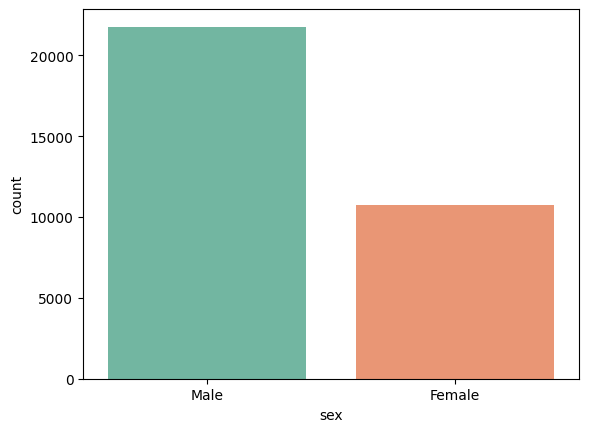

In [ ]:
sns.countplot(data=df_train, x="sex", hue="sex", palette="Set2")

#### Task 2: Plot and Compare Income by Gender

<Axes: xlabel='sex', ylabel='count'>

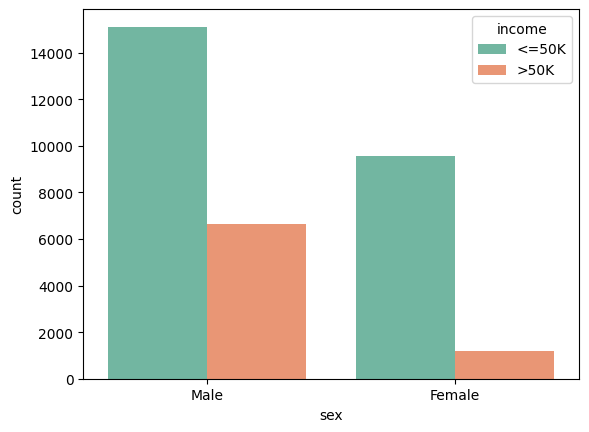

In [ ]:
# oh-oh, it seems like men have more chance to receive income above 50K
sns.countplot(x='sex', hue='income', data=df_train, palette="Set2")

### Exploring Relationship between Age and Income

#### Task 1: Visualize the Distribution of Age vs. Income using violinplot

Answer the following questions:

- What patterns can be observed in the age group with income above 50k?

- Is it common for younger individuals to have an income above 50k?

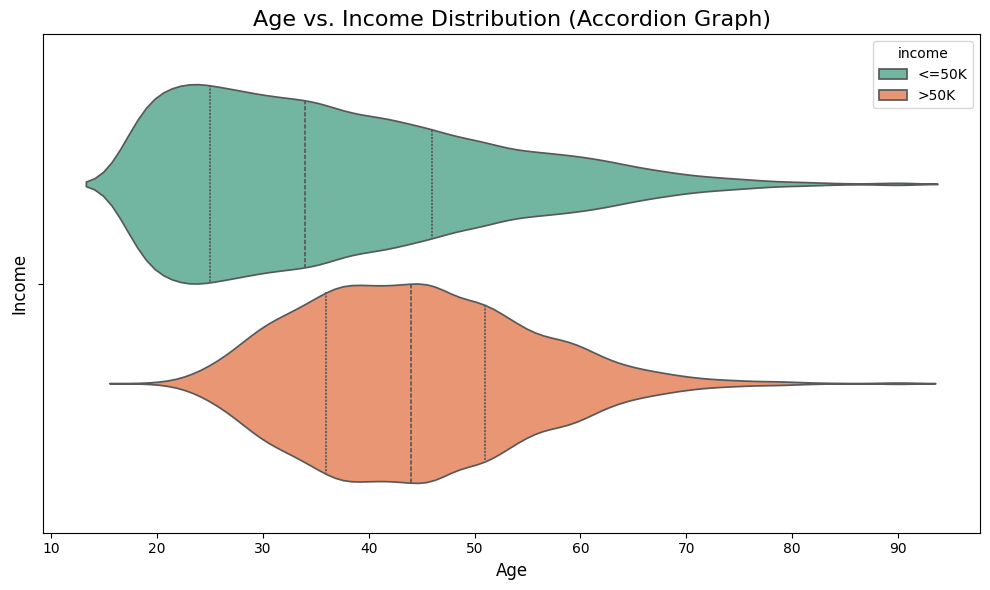

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='age', hue='income', data=df_train, inner="quart", density_norm='width',palette="Set2")

plt.title('Age vs. Income Distribution (Accordion Graph)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)

plt.tight_layout()
plt.show()

#### Task 2: Visualize and Compare the Age Distribution Across Different Races using a Violin Plot

Answer the Following question:
- Which race has the highest concentration of middle-aged individuals?

<Axes: xlabel='race', ylabel='age'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


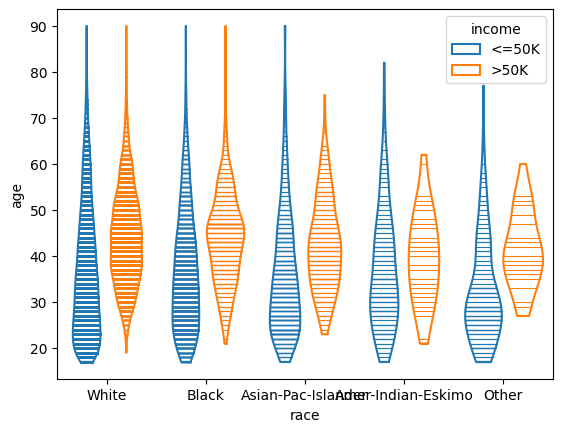

In [ ]:
sns.violinplot(data=df_train, x="race", y="age", hue="income" , fill=False,common_norm=True, inner="stick", cut=False)

### Exploring Relationship between Race and Income

#### Task 1: Visualize the Income Distribution Across Different Races

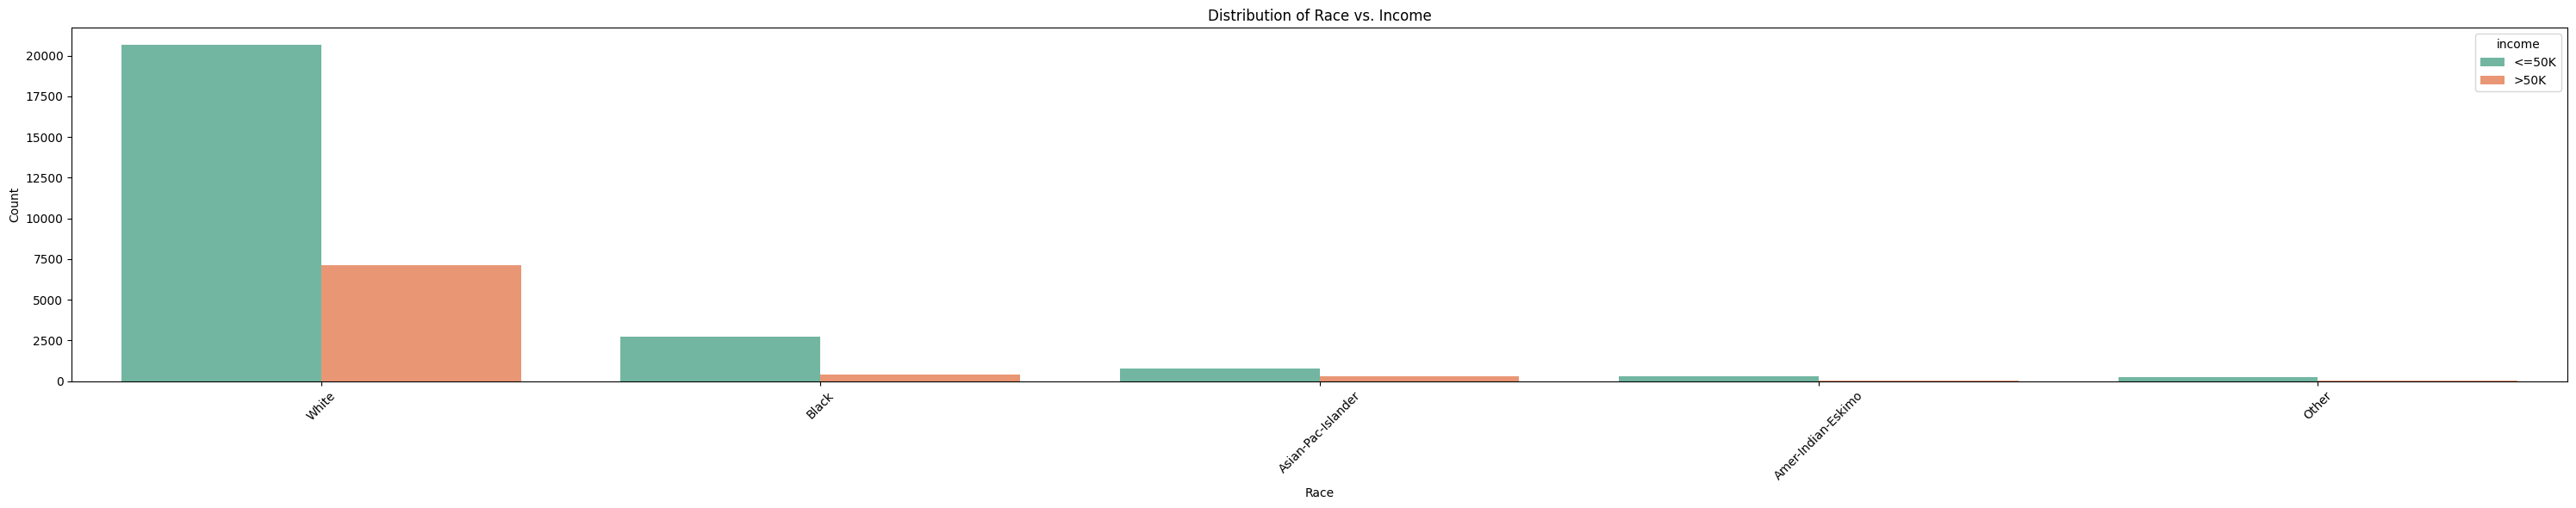

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='race', hue='income', data=df_train , palette="Set2")

plt.title('Distribution of Race vs. Income')
plt.xlabel('Race')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Task 2: Plot and Sort Races Based on the Highest Proportion of High-Income Individuals Across Races

Answer the following question:

- Which race has the highest proportion of high-income individuals?

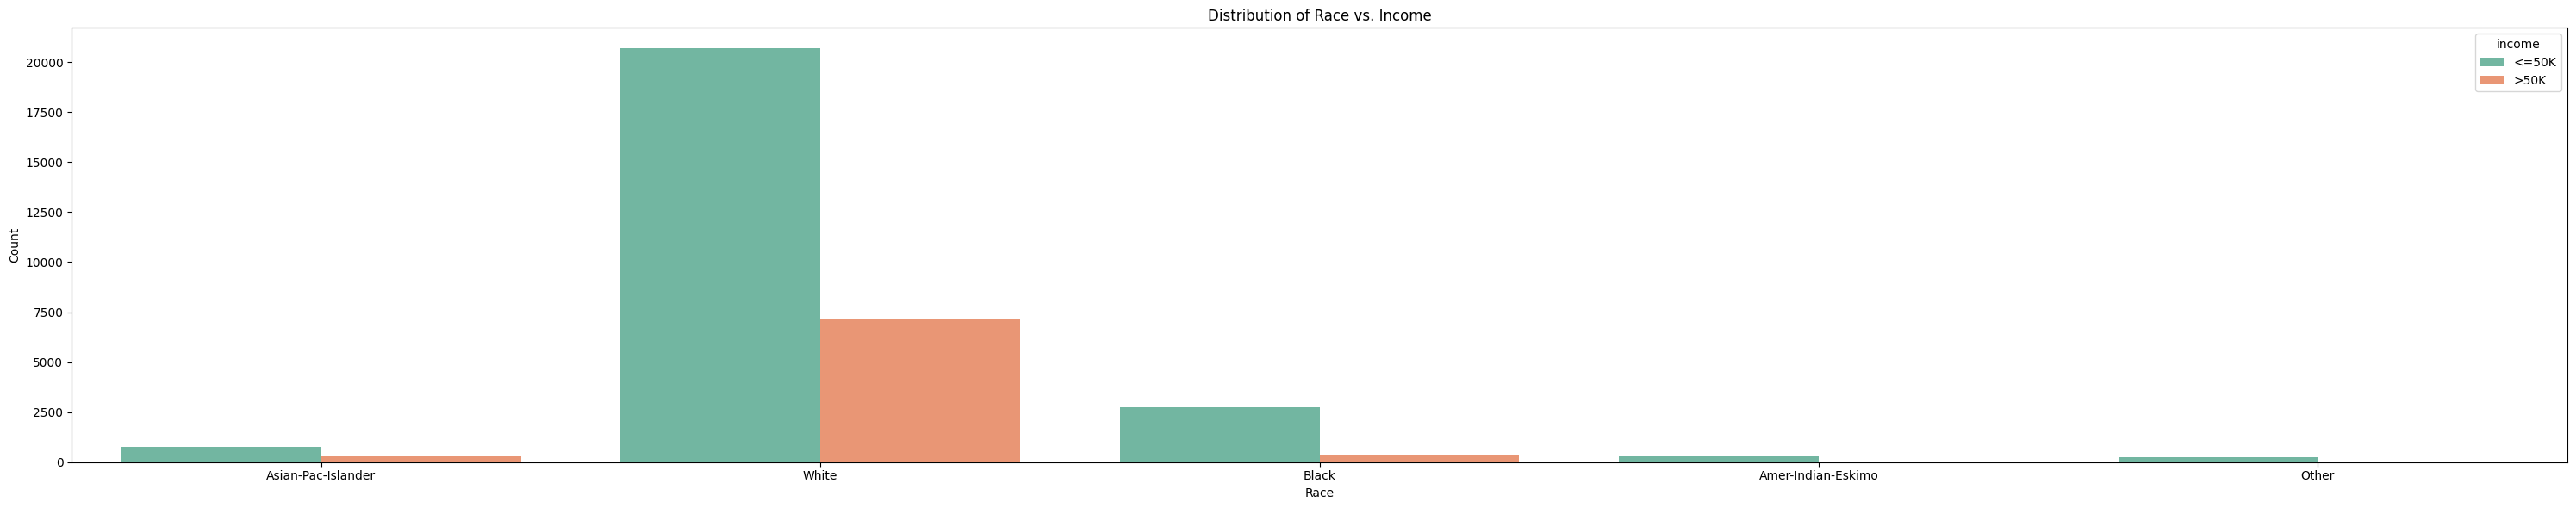

In [ ]:
# Calculate the proportion of high-income individuals for each race
income_proportion = df_train[df_train['income'] == '>50K'].groupby('race').size() / df_train.groupby('race').size()

# Sort races by proportion of high-income individuals
sorted_races = income_proportion.sort_values(ascending=False).index

# Plot the count plot with races ordered by the high-income proportion
plt.figure(figsize=(30, 6))
sns.countplot(x='race', hue='income', data=df_train, order=sorted_races, palette="Set2")

plt.title('Distribution of Race vs. Income')
plt.xlabel('Race')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Exploring the Relationship Between Marital Status and Income


- Similar to the previous sections, use various plots to explore and identify patterns between the `Relationship`, `Marital Status`, and `Income` features. You are free to choose any types of plots that you find suitable for the analysis.

In [ ]:
# TODO

### Exploring the Relationship Between Occupation, Workclass and Income

- Similar to the previous sections, use various plots to explore and identify patterns between the `Occupation`, `Workclass`, and `Income` features. You are free to choose any types of plots that you find suitable for the analysis.

In [ ]:
# TODO

### Describing the Final Persona

Based on the insights from the previous sections, describe a persona that has a high likelihood of earning above 50k in a year. Consider factors such as age, race, marital status, and relationship status to outline the characteristics of this individual.

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>


</p>
</font>
<hr>

# Step 4: Handle Missing Values


There are several ways to deal with missing values. Below are some common strategies:

### Missing Value Strategies

#### For **numerical features**:
- `Drop rows` that have missing values
- `Fill with mean`
- `Fill with median`
- `Use KNN or regression imputation`

#### For **categorical features**:
- `Drop rows` with missing categories
- `Fill with the most frequent value` (mode)
- `Fill with a new category` like "Unknown"
- `Use model-based imputation`

---

 **Task**:  
1. **Which method(s) do you think are best for this dataset?**  
2. **Why?** Consider the number of missing values, the type of features, and how it may affect modeling.  
3. Implement your chosen strategy below.


In [ ]:
# TODO: Choose and implement your own missing value handling strategy
# Write your code below:


In [ ]:
# Impute missing values in categorical columns with the mode
for column in ['workclass', 'occupation', 'native-country']:
  df_train[column].fillna(df_train[column].mode()[0], inplace=True)
  df_test[column].fillna(df_train[column].mode()[0], inplace=True)


<ipython-input-29-6bb17360bc3b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[column].fillna(df_train[column].mode()[0], inplace=True)
<ipython-input-29-6bb17360bc3b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

# Step 7: Identify Categorical Features


Most machine learning models require numerical input. We must convert **categorical columns** to numbers.

There are several encoding methods. Each method has strengths and weaknesses depending on the dataset and the type of model you're using.

---

### Common Encoding Techniques

1. **One-Hot Encoding**  
2. **Label Encoding**  
3. **Frequency Encoding**  
4. **Target / Mean Encoding**  
5. **Binary Encoding**  
6. **Hash Encoding**

---

 **Your Task**:

1. Research the methods above (or based on what we've discussed in class).
2. For each method, briefly write down:
   - When you might use it
   - Its potential pros and cons
3. Choose the one(s) you think work best for this dataset.
4. Explain **why** your choice is appropriate.
5. Implement your encoding method(s) in the code cell below.




In [ ]:
# TODO: Encode categorical columns using the method you chose

# Example (One-Hot Encoding):
# df_train = pd.get_dummies(df_train, columns=categorical_cols)

# Write your code below:


In [ ]:
# Get list of numerical columns
num_cols = df_train.select_dtypes(include=["int64", "float64"]).columns
# Get list of categorical columns
categorical_cols = df_train.select_dtypes(include=["object", "category"]).columns

# Print unique values for each categorical column
for col in categorical_cols:
    print(f"{col}:")
    print(df_train[col].value_counts().index.tolist())
    print("-" * 40)


workclass:
['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']
----------------------------------------
education:
['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool']
----------------------------------------
marital-status:
['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']
----------------------------------------
occupation:
['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces']
----------------------------------------
relationship:
['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative']
------------------

In [ ]:

target_col = 'income'

# target mapping
df_train['income_encoded'] = df_train['income'].map({'<=50K':0, '>50K':1})
df_test['income_encoded'] = df_test['income'].map({'<=50K':0, '>50K':1})

# --- Frequency Encoding
freq_encode_cols = ['native-country', 'race', 'workclass']
for col in freq_encode_cols:
    freq_map = df_train[col].value_counts(normalize=True)
    df_train[col + '_freq_enc'] = df_train[col].map(freq_map)
    df_test[col + '_freq_enc'] = df_test[col].map(freq_encode := df_train[col].value_counts(normalize=True))
    df_test[col] = df_test[col].fillna(df_train[col].mode()[0])  # Handle unseen categories if any

# --- Target Encoding
target_encode_cols = ['occupation', 'relationship', 'marital-status', 'education']
for col in target_encode_cols:
    target_means = df_train.groupby(col)['income_encoded'].mean()
    df_train[col + '_target_enc'] = df_train[col].map(target_means)
    df_test[col + '_target_enc'] = df_test[col].map(target_means)

    # Handle unseen categories
    df_test[col + '_target_enc'].fillna(df_train['income_encoded'].mean(), inplace=True)


# # --- Frequency Encoding
# freq_encode_cols = ['native-country', 'race', 'workclass','occupation', 'relationship', 'marital-status', 'education']
# for col in freq_encode_cols:
#     freq_map = df_train[col].value_counts(normalize=True)
#     df_train[col + '_freq_enc'] = df_train[col].map(freq_map)
#     df_test[col + '_freq_enc'] = df_test[col].map(freq_encode := df_train[col].value_counts(normalize=True))
#     df_test[col] = df_test[col].fillna(df_train[col].mode()[0])  # Handle unseen categories if any


# --- One-Hot Encoding for `sex` (Low cardinality, binary) ---
df_train['sex_enc'] = df_train['sex'].map({'Male': 1, 'Female': 0})
df_test['sex_enc'] = df_test['sex'].map({'Male': 1, 'Female': 0})


# --- Drop original categorical columns ---
drop_cols = categorical_cols
df_train = df_train.drop(columns=drop_cols)
df_test = df_test.drop(columns=drop_cols)

df_train=df_train.drop(['fnlwgt'],axis=1)
df_test=df_test.drop(['fnlwgt'],axis=1)



<ipython-input-32-184f04268269>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[col + '_target_enc'].fillna(df_train['income_encoded'].mean(), inplace=True)
<ipython-input-32-184f04268269>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

# Step 8: Correlation Matrix (Numerical Features)

Correlation helps us understand how strongly features are related to each other.  
This is useful for:
- Detecting multicollinearity (when features are too similar)
- Spotting features that might be predictive of the target variable

We'll compute the correlation matrix and visualize it with a heatmap.


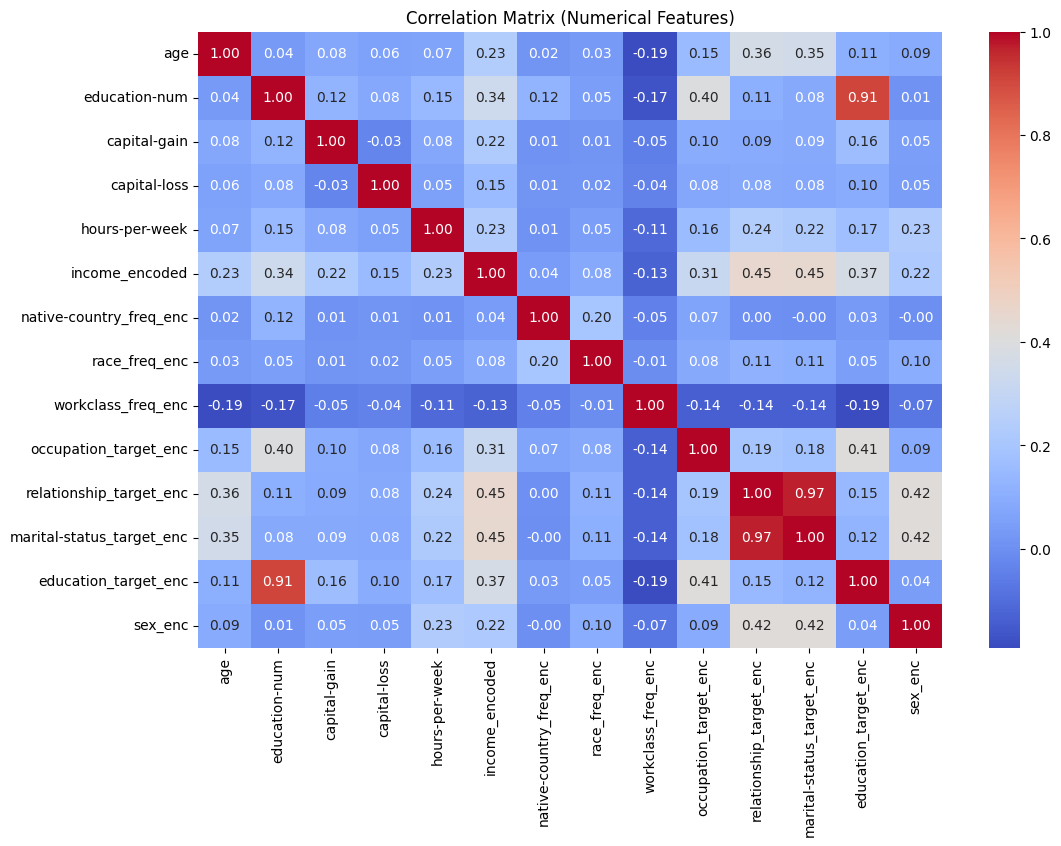

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix (numerical features only)
corr_matrix = df_train.select_dtypes(include=['int64', 'float64']).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


In [ ]:
feature_cols = [col for col in df_train.columns if col != 'income_encoded']
X = df_train[feature_cols]
y = df_train['income_encoded']
X_test = df_test[feature_cols]
y_test = df_test['income_encoded']

# Step 9: Feature Scaling

Before addressing class imbalance, we apply feature scaling to the numerical features.
Scaling ensures that features contribute equally to the model training process and improves convergence for many machine learning algorithms.

### Scaling Methods:

#### 1. StandardScaler
- standardizes features by removing the mean and scaling to unit variance.

#### 2. MinMaxScaler
- scales features to a given range (usually [0, 1]).

#### 3. MaxAbsScaler

- scales features by their maximum absolute value.

#### 4. RobustScaler
- scales features using statistics that are robust to outliers.

#### 5. Normalizer
- scales individual samples to have unit norm.

---
 **Your Task**:
1. Choose a scaling method and explain your reasoning.
2. Implement your chosen method below.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numerical features in the training set
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Step 10: Dealing with Class Imbalance

### Identifying Class Imbalance
In classification problems, it is common to have **imbalanced** classes, where one class has far more examples than the other. This can negatively impact model performance since many standard algorithms assume a balanced dataset.

**Question**: Where do we use resampling?

Our target variable `income` is imbalanced — most people earn `<=50K`.

This imbalance can cause models to:
- Be biased toward the majority class
- Fail to learn patterns of the minority class

### Resampling Techniques

#### 1. Random OverSampling
- Duplicate samples from the minority class

#### 2. Random UnderSampling
- Remove samples from the majority class

#### 3. SMOTE (Synthetic Minority Over-sampling Technique)
- Generate new synthetic samples from the minority class

---

 **Your Task**:
1. Inspect the class distribution.
2. Choose a resampling strategy and explain your reasoning.
3. Implement your strategy below.


In [ ]:
# TODO: Implement class balancing technique

# Class distribution before resampling
print("Class distribution before resampling:")
print(df_train['income_encoded'].value_counts())

# EXAMPLES (uncomment and use as needed):

# # -- Random Oversampling --
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X, y)

# # -- Random Undersampling --
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X, y)

# -- SMOTE --
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Write your code here:


Class distribution before resampling:
income_encoded
0    24698
1     7839
Name: count, dtype: int64


In [ ]:
print("Class distribution before resampling:")
print(y_resampled.value_counts())


Class distribution before resampling:
income_encoded
0    24698
1    24698
Name: count, dtype: int64


### Re-evaluating the Need for Resampling:  
<b> <font color='red'>Question:</font></b> In this case, should we use resampling or not, and why?  

# Step 11: Modeling and Evaluation

In this part of the project, you will apply and compare several machine learning models on the training dataset. Each model uses a different mathematical approach to learn from the data and make predictions. Your goal is to identify the most effective model based on the evaluation metrics and determine which model provides the best generalization to unseen data.

## 11.1 Overview of the Modeling Section
You need to implement a range of classifiers that represent different types of machine learning algorithms, including:

- **K-Nearest Neighbors (KNN):** A simple, non-parametric method that makes predictions based on the majority class of the nearest neighbors in the feature space.
- **Decision Trees:** A tree-like model where decisions are made based on feature values, with each branch representing a feature condition and each leaf representing a class label.
- **Random Forest:** An ensemble of decision trees that improves prediction accuracy by averaging multiple models to reduce overfitting.
- **Gradient Boosting Methods (XGBoost, LightGBM):** Advanced ensemble techniques that build trees sequentially, where each new tree attempts to correct the errors of the previous one.
- **Logistic Regression:** A linear model used for binary or multi-class classification that predicts the probability of class membership.
- **Support Vector Machines (SVM):** A classifier that finds the hyperplane that best separates data points of different classes.
- **Neural Networks:** A class of models inspired by biological neural networks, capable of learning complex patterns in large datasets.

**Write a function that:**

- **Takes** `y_test` (true labels) and `y_pred` (predicted labels),
- **Computes**: Accuracy, Precision, Recall, F1,
- **Plots**: ROC Curve + AUC and Precision-Recall curve,
- **Displays**: Confusion Matrix.

**Note: You may need to read Part 13 before implementing this function.**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

def evaluation(y_test, y_prediction):
    """
    Prints Accuracy, Precision, Recall, F1-score, Confusion Matrix,
    and plots the ROC curve with AUC for a binary classifier.

    Parameters
    ----------
    y_test : array-like of shape (n_samples,)
        True binary labels (0 or 1).
    y_prediction : array-like
        Either:
         - shape (n_samples,) of predicted probabilities for class 1, or
         - shape (n_samples, 2) of predicted class‑probabilities.
    """
    # --- get predicted probabilities for the positive class ---
    y_score = np.asarray(y_prediction)
    if y_score.ndim == 2 and y_score.shape[1] == 2:
        # assume columns are [P(class=0), P(class=1)]
        y_score = y_score[:, 1]

    # --- get hard predictions by thresholding at 0.5 ---
    y_pred_labels = (y_score >= 0.5).astype(int)

    # --- compute and print metrics ---
    acc   = accuracy_score(y_test, y_pred_labels)
    prec  = precision_score(y_test, y_pred_labels)
    rec   = recall_score(y_test, y_pred_labels)
    f1    = f1_score(y_test, y_pred_labels)
    cm    = confusion_matrix(y_test, y_pred_labels)

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # --- ROC curve & AUC ---
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

### 1. K-Nearest Neighbors (KNN)

KNN is a simple algorithm that makes predictions based on the closest data points in the training set. It looks at the ‘K’ nearest neighbors (based on distance) to a new point and assigns the most common class among those neighbors.

 **Your Task**:
1.  Implement and train the KNN classifier on the training dataset.(and then evaluate it on the test dataset)

Accuracy : 0.8331
Precision: 0.6665
Recall   : 0.5871
F1-score : 0.6243
Confusion Matrix:
[[11305  1130]
 [ 1588  2258]]


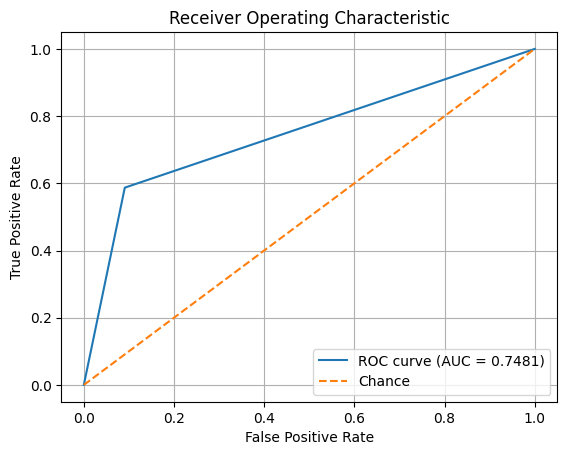

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X, y)

# Predict on test data
knn_preds = knn_model.predict(X_test)

# Evaluate the model
evaluation(y_test ,knn_preds )


2. Answer this question:How does  'K' in KNN  affect the model's performance?

<b> <font color='red'>Your Answer:</font></b><br>

Smaller values can make the model more sensitive to noise, while larger values provide more smoothing but might miss finer patterns.

### 2. Decision Tree

A decision tree makes predictions by splitting the data into smaller groups based on feature values. At each step (node), it chooses the best condition to separate the data, leading to a tree-like structure where each leaf gives a prediction.

 **Your Task**:
1. Implement and train the Decision Tree classifier on the training dataset.(and then evaluate it on the test dataset)

Accuracy : 0.8224
Precision: 0.6270
Recall   : 0.6131
F1-score : 0.6200
Confusion Matrix:
[[11032  1403]
 [ 1488  2358]]


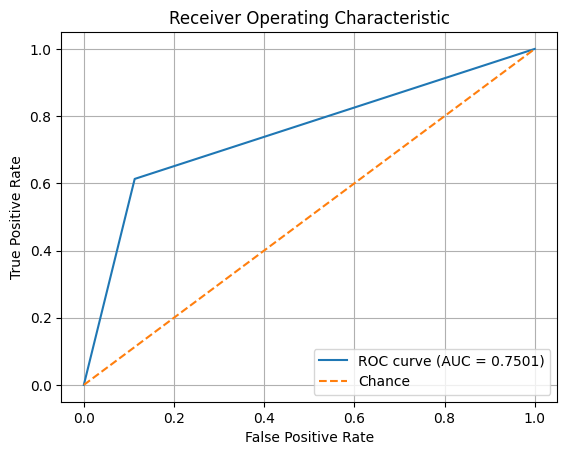

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X, y)

# Predict on test data
dt_preds = dt_model.predict(X_test)

# Evaluate the model
evaluation(y_test ,dt_preds )


2. Answer this question:How does a decision tree decide where to split the data?

<b> <font color='red'>Your Answer:</font></b><br>

 It selects features that provide the best split by minimizing impurity (using metrics like Gini or entropy).

### 3. Random Forest (Ensemble of Decision Trees)

Random Forest is an ensemble method that builds many decision trees on different parts of the data and combines their results. Each tree votes on the prediction, and the majority vote is taken as the final output.

 **Your Task**:
1. Implement and train the Random Forest classifier on the training dataset.(and then evaluate it on the test dataset)

Accuracy : 0.8474
Precision: 0.7057
Recall   : 0.6071
F1-score : 0.6527
Confusion Matrix:
[[11461   974]
 [ 1511  2335]]


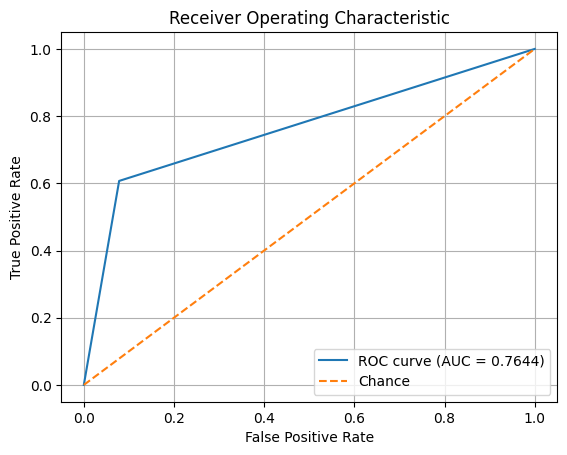

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X, y)

# Predict on test data
rf_preds = rf_model.predict(X_test)

# Evaluate the model
evaluation(y_test ,rf_preds )

2. Answer this question:Why does Random Forest use more than one decision tree?

<b> <font color='red'>Your Answer:</font></b><br>

To reduce overfitting and improve accuracy by averaging the results of many different trees, each trained on slightly different data.

### 4. radient Boosting Models (XGBoost, LightGBM, CatBoost)

These models build decision trees one at a time, where each new tree focuses on fixing the errors made by the previous ones. This process is called “boosting.” They add up the results of many trees to improve accuracy step-by-step.

###4-1)XGBoost

XGBoost builds decision trees sequentially, where each new tree focuses on correcting the errors of the previous ones. It uses a special technique called “gradient boosting” to minimize the overall loss function efficiently.

 **Your Task**:
1. implement and train the XGBoost classifier on the training dataset.(and then evaluate it on the test dataset)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:41:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy : 0.8721
Precision: 0.7716
Recall   : 0.6516
F1-score : 0.7065
Confusion Matrix:
[[11693   742]
 [ 1340  2506]]


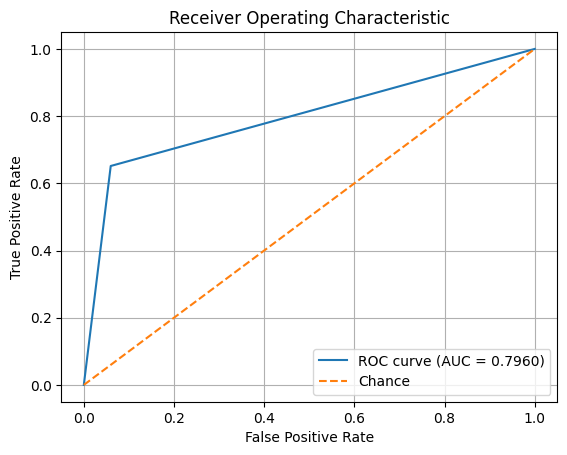

In [ ]:
import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X, y)

# Predict on test data
xgb_preds = xgb_model.predict(X_test)

# Evaluate the model
evaluation(y_test ,xgb_preds )


2. Answer this question:Why does XGBoost build trees in sequence?

<b> <font color='red'>Your Answer:</font></b><br>

To improve predictions by fixing past mistakes.


###4-2)LightGBM

LightGBM (Light Gradient Boosting Machine) is a fast, efficient gradient LightGBM is a gradient boosting algorithm that grows trees leaf-wise instead of level-wise, meaning it chooses the leaf with the highest error to grow, which leads to faster and potentially more accurate learning.

 **Your Task**:
1. Implement and train the LightGBM classifier on the training dataset.(and then evaluate it on the test dataset)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7839, number of negative: 24698
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 32537, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240926 -> initscore=-1.147611
[LightGBM] [Info] Start training from score -1.147611


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy : 0.8721
Precision: 0.7729
Recall   : 0.6495
F1-score : 0.7058
Confusion Matrix:
[[11701   734]
 [ 1348  2498]]


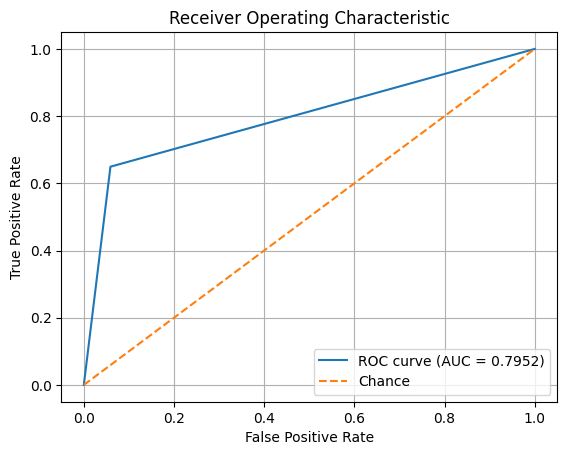

In [ ]:
from lightgbm import LGBMClassifier

# Initialize the model
model_lgbm = LGBMClassifier(random_state=42)

# Train the model
model_lgbm.fit(X, y)

# Predict
lgbm_preds = model_lgbm.predict(X_test)

# Evaluate
evaluation(y_test ,lgbm_preds )


2. Answer this question:How does LightGBM grow trees differently?

<b> <font color='red'>Your Answer:</font></b><br>

It grows them leaf-wise instead of level-wise.

### 5. Logistic Regression

Logistic Regression is a model that calculates the probability of a data point belonging to a class. It uses a linear combination of input features and passes the result through a function that outputs values between 0 and 1 (called the sigmoid function).

 **Your Task**:
1. Implement and train the Logistic Regression classifier on the training dataset.(and then evaluate it on the test dataset)

Accuracy : 0.8479
Precision: 0.7252
Recall   : 0.5736
F1-score : 0.6405
Confusion Matrix:
[[11599   836]
 [ 1640  2206]]


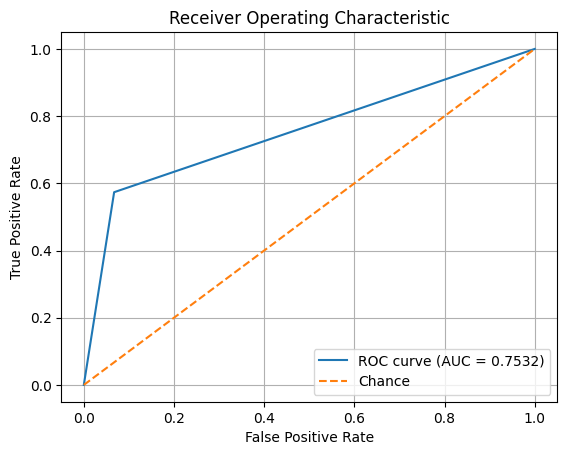

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train
model_logreg = LogisticRegression(max_iter=1000, random_state=42)
model_logreg.fit(X, y)

# Predict
logreg_preds = model_logreg.predict(X_test)

# Evaluate
evaluation(y_test ,logreg_preds )


2. Answer this question:How is the linear formula used in this logistic regression?

<b> <font color='red'>Your Answer:</font></b><br>
The model calculates a weighted sum of the input features (a linear combination) and applies the sigmoid function to predict the probability of a class.

### 6. SVM with different kernels (e.g., linear, RBF)

SVM finds a line (or a plane in higher dimensions) that best separates the classes in the data. It tries to place this line as far as possible from the nearest points of each class. With different kernels (like linear or RBF), it can also handle non-linear data.

 **Your Task**:
1. Implement and train the SVM classifier on the training dataset.(and then evaluate it on the test dataset)

SVM (Linear) Accuracy: 0.8468153061851238
Accuracy : 0.8534
Precision: 0.7665
Recall   : 0.5455
F1-score : 0.6374
Confusion Matrix:
[[11796   639]
 [ 1748  2098]]


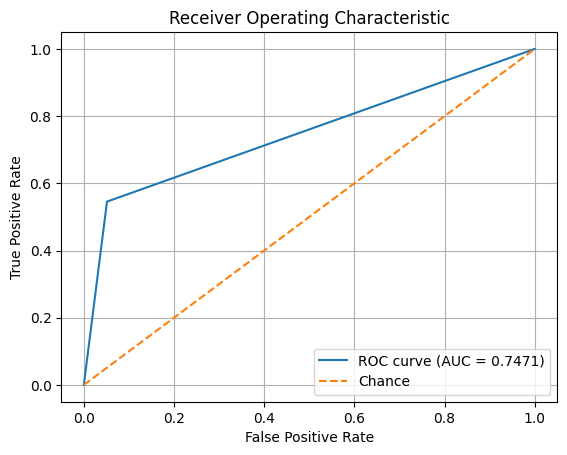

In [ ]:
from sklearn.svm import SVC

# Linear kernel
model_svm_linear = SVC(kernel='linear')
model_svm_linear.fit(X, y)
y_pred_svm_linear = model_svm_linear.predict(X_test)
print("SVM (Linear) Accuracy:", accuracy_score(y_test, y_pred_svm_linear))

# RBF kernel
model_svm_rbf = SVC(kernel='rbf')
model_svm_rbf.fit(X, y)
svc_preds = model_svm_rbf.predict(X_test)

# Evaluate
evaluation(y_test ,svc_preds )

2. Answer this question:How does SVM handle data that can’t be separated by a straight line?

<b> <font color='red'>Your Answer:</font></b><br>
It uses a kernel function (like RBF) to map the data into a higher-dimensional space where it can be separated linearly.

### 7. Neural Networks (simple MLP for classification)

A Multi-Layer Perceptron (MLP) is a neural network made of layers of connected nodes (neurons). Each neuron takes inputs, applies weights and an activation function, and passes the result to the next layer. It learns by adjusting the weights to reduce prediction error.

 **Your Task**:
1. Implement and train the Neural Networks classifier (simple MLP for classification) on the training dataset.(and then evaluate it on the test dataset)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy : 0.8534
Precision: 0.7477
Recall   : 0.5725
F1-score : 0.6485
Confusion Matrix:
[[11692   743]
 [ 1644  2202]]


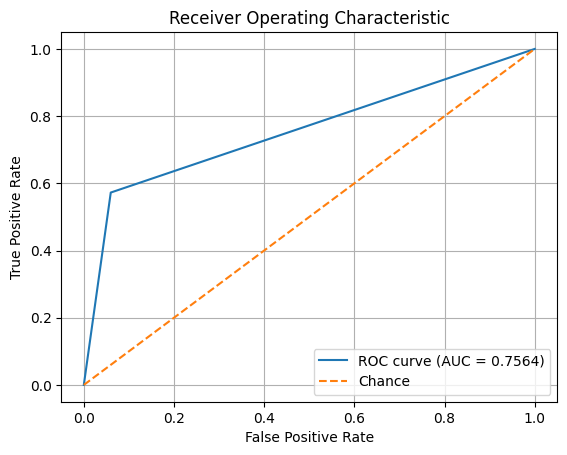

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize and train
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
model_mlp.fit(X, y)

# Predict
mlp_preds = model_mlp.predict(X_test)

# Evaluate
evaluation(y_test ,mlp_preds )

2. Answer this question:What happens during the learning process in a neural network?

<b> <font color='red'>Your Answer:</font></b><br>
The network adjusts the weights of connections between neurons through backpropagation to reduce prediction error.


# Step 12: Hyperparameter Tuning
Once you have selected the models, you will perform **hyperparameter tuning** to optimize their performance. Hyperparameters are settings that are not learned directly from the data and must be set before training. Examples include the number of neighbors in KNN or the depth of trees in decision tree models.

**Overview:**

You are required to implement the following methods for tuning:

- **Grid Search:** Use Grid Search to search for the best combination of hyperparameters by exhaustively trying all possible combinations in the predefined grid.
- **Randomized Search:** This method performs a randomized search over hyperparameters, sampling from specified distributions. It is more efficient than Grid Search when the search space is large.
- **Bayesian Optimization (optional):** Implement Bayesian optimization using libraries like **Optuna** or **Hyperopt**. This method optimizes hyperparameters by considering prior knowledge of the search space and efficiently explores the most promising configurations.


### 1. Grid Search

Grid Search is a method used to find the best combination of hyperparameters by trying out every possible combination from a predefined set of values. For each combination, the model is trained and evaluated, and the one that gives the best result on a validation set is chosen. It helps you systematically explore which settings work best for your model.

**Your Task**:

1.Perform Grid Search on the models.

In [ ]:
X_train = X
y_train = y

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models_grid = {
    "KNN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    "DecisionTree": (DecisionTreeClassifier(), {'max_depth': [5, 10], 'min_samples_split': [2, 5]}),
    "RandomForest": (RandomForestClassifier(), {'n_estimators': [100, 200], 'max_depth': [10, 20]}),
    "XGBoost": (XGBClassifier(verbosity=0), {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}),
    "LogisticRegression": (LogisticRegression(solver='liblinear'), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    "SVM": (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    "MLP": (MLPClassifier(max_iter=500), {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001]})
}

best_models_grid = {}

for name, (model, param_grid) in models_grid.items():
    grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models_grid[name] = grid.best_estimator_
    print(f"{name} Best Score: {grid.best_score_:.4f}, Best Params: {grid.best_params_}")


KNN Best Score: 0.8382, Best Params: {'n_neighbors': 7}
DecisionTree Best Score: 0.8611, Best Params: {'max_depth': 10, 'min_samples_split': 5}
RandomForest Best Score: 0.8647, Best Params: {'max_depth': 20, 'n_estimators': 200}
XGBoost Best Score: 0.8723, Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
LogisticRegression Best Score: 0.8480, Best Params: {'C': 0.1, 'penalty': 'l1'}
SVM Best Score: 0.8525, Best Params: {'C': 10, 'kernel': 'rbf'}
MLP Best Score: 0.8538, Best Params: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,)}


2. Answer this question:Is Grid Search efficient for large search spaces?

<b> <font color='red'>Your Answer:</font></b><br>
No, it becomes slow with many parameters.

### 2. Randomized Search

Randomized Search selects random combinations of hyperparameters from specified distributions instead of testing every single one. You choose how many random combinations to try, and the best one is picked based on performance. It's useful when you want to sample from a wide space without checking everything.

**Your Task**:

1.Perform Randomized Search on the models.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform, loguniform

models_random = {
    "KNN": (KNeighborsClassifier(), {'n_neighbors': randint(1, 20)}),
    "DecisionTree": (DecisionTreeClassifier(), {'max_depth': randint(3, 20), 'min_samples_split': randint(2, 10)}),
    "RandomForest": (RandomForestClassifier(), {'n_estimators': randint(100, 300), 'max_depth': randint(5, 20)}),
    "XGBoost": (XGBClassifier(verbosity=0), {'n_estimators': randint(100, 300), 'learning_rate': uniform(0.01, 0.2), 'max_depth': randint(3, 10)}),
    "LogisticRegression": (LogisticRegression(solver='liblinear'), {'C': loguniform(1e-3, 1e2), 'penalty': ['l1', 'l2']}),
    "SVM": (SVC(), {'C': loguniform(1e-2, 1e2), 'kernel': ['linear', 'rbf']}),
    "MLP": (MLPClassifier(max_iter=500), {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': loguniform(1e-5, 1e-2)})
}

best_models_random = {}

for name, (model, param_dist) in models_random.items():
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)
    best_models_random[name] = random_search.best_estimator_
    print(f"{name} Best Score: {random_search.best_score_:.4f}, Best Params: {random_search.best_params_}")


KNN Best Score: 0.8435, Best Params: {'n_neighbors': 19}
DecisionTree Best Score: 0.8607, Best Params: {'max_depth': 10, 'min_samples_split': 6}
RandomForest Best Score: 0.8662, Best Params: {'max_depth': 15, 'n_estimators': 187}
XGBoost Best Score: 0.8714, Best Params: {'learning_rate': np.float64(0.13349630192554332), 'max_depth': 4, 'n_estimators': 121}
LogisticRegression Best Score: 0.8481, Best Params: {'C': np.float64(0.16949768237884735), 'penalty': 'l1'}
SVM Best Score: 0.8527, Best Params: {'C': np.float64(6.79657809075816), 'kernel': 'rbf'}
MLP Best Score: 0.8535, Best Params: {'alpha': np.float64(4.335281794951564e-05), 'hidden_layer_sizes': (50,)}


2. Answer this question:What’s the main difference from Grid Search?

<b> <font color='red'>Your Answer:</font></b><br>
 Randomized Search samples random combinations instead of checking all.

### 3. Bayesian Optimization (optional, e.g., with libraries like Optuna or Hyperopt)

Bayesian Optimization is a smarter way of tuning hyperparameters. It builds a model of the performance (objective function) based on past results and decides which hyperparameters to try next by predicting which ones might work better. Libraries like Optuna or Hyperopt help automate this process.

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 9.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    model_name = trial.suggest_categorical("model", ["KNN", "DecisionTree", "RandomForest", "XGBoost", "LogisticRegression", "SVM", "MLP"])

    if model_name == "KNN":
        model = KNeighborsClassifier(n_neighbors=trial.suggest_int("n_neighbors", 1, 20))

    elif model_name == "DecisionTree":
        model = DecisionTreeClassifier(
            max_depth=trial.suggest_int("max_depth", 3, 20),
            min_samples_split=trial.suggest_int("min_samples_split", 2, 10)
        )

    elif model_name == "RandomForest":
        model = RandomForestClassifier(
            n_estimators=trial.suggest_int("n_estimators", 100, 300),
            max_depth=trial.suggest_int("max_depth", 5, 20)
        )

    elif model_name == "XGBoost":
        model = XGBClassifier(
            n_estimators=trial.suggest_int("n_estimators", 100, 300),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            max_depth=trial.suggest_int("max_depth", 3, 10),
            verbosity=0
        )

    elif model_name == "LogisticRegression":
        model = LogisticRegression(
            C=trial.suggest_float("C", 0.01, 100, log=True),
            penalty=trial.suggest_categorical("penalty", ["l1", "l2"]),
            solver='liblinear'
        )

    elif model_name == "SVM":
        model = SVC(
            C=trial.suggest_float("C", 0.01, 100, log=True),
            kernel=trial.suggest_categorical("kernel", ["linear", "rbf"])
        )

    elif model_name == "MLP":
        model = MLPClassifier(
            hidden_layer_sizes=trial.suggest_categorical("hidden", [(50,), (100,), (50, 50)]),
            alpha=trial.suggest_float("alpha", 1e-5, 1e-2, log=True),
            max_iter=500
        )

    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best Trial:", study.best_trial)


[I 2025-04-13 00:06:41,397] A new study created in memory with name: no-name-5dd8b577-f404-4584-9c5e-7a9a29204a1d
[I 2025-04-13 00:06:47,780] Trial 0 finished with value: 0.8721456610323989 and parameters: {'model': 'XGBoost', 'n_estimators': 267, 'learning_rate': 0.08282624972712248, 'max_depth': 6}. Best is trial 0 with value: 0.8721456610323989.
[I 2025-04-13 00:06:48,400] Trial 1 finished with value: 0.8478348612273351 and parameters: {'model': 'LogisticRegression', 'C': 9.83438133854698, 'penalty': 'l1'}. Best is trial 0 with value: 0.8721456610323989.
[I 2025-04-13 00:07:21,512] Trial 2 finished with value: 0.848418799527685 and parameters: {'model': 'SVM', 'C': 0.059201974832138626, 'kernel': 'linear'}. Best is trial 0 with value: 0.8721456610323989.
[I 2025-04-13 00:07:23,599] Trial 3 finished with value: 0.8689492990158744 and parameters: {'model': 'XGBoost', 'n_estimators': 286, 'learning_rate': 0.1343626513711906, 'max_depth': 8}. Best is trial 0 with value: 0.87214566103239

Best Trial: FrozenTrial(number=42, state=1, values=[0.8725452193911032], datetime_start=datetime.datetime(2025, 4, 13, 0, 14, 6, 346639), datetime_complete=datetime.datetime(2025, 4, 13, 0, 14, 7, 145116), params={'model': 'XGBoost', 'n_estimators': 169, 'learning_rate': 0.1657482983687736, 'max_depth': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'model': CategoricalDistribution(choices=('KNN', 'DecisionTree', 'RandomForest', 'XGBoost', 'LogisticRegression', 'SVM', 'MLP')), 'n_estimators': IntDistribution(high=300, log=False, low=100, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1)}, trial_id=42, value=None)


2. Answer this question:What makes Bayesian Optimization smart?

<b> <font color='red'>Your Answer:</font></b><br>
 It uses previous results to guide the next parameter choices.

# Step 13:Evaluation
This part of the project focuses on assessing the performance of the trained models. It involves comparing the model's predictions with the actual outcomes from the test dataset. This step helps determine how well each model generalizes to unseen data.

**Your Task**:

1.Answer this question: What are the formulas for Accuracy, Precision, Recall, F1-score?

<b> <font color='red'>Your Answer:</font></b><br>
 -Accuracy measures the proportion of correct predictions (both positive and negative) made by the model.

 -Precision shows how many of the predicted positive instances are actually positive.

-Recall measures how many of the actual positive instances were correctly identified by the model.

-The F1-score is the harmonic mean of Precision and Recall, providing a balance between them.

2.Answer this question: What are the ROC Curve & AUC curve?

<b> <font color='red'>Your Answer:</font></b><br>
ROC Curve (Receiver Operating Characteristic Curve):
The ROC curve is a graphical representation that shows the performance of a binary classification model at all classification thresholds. It plots the True Positive Rate (Recall) against the False Positive Rate. A higher area under the ROC curve indicates a better model.

AUC (Area Under the Curve):
AUC is the area under the ROC curve. It gives a single value that summarizes the model's ability to discriminate between the classes. An AUC of 0.5 means the model is no better than random guessing, and an AUC of 1 means a perfect model.

3.Answer this question: What is a Confusion Matrix?

<b> <font color='red'>Your Answer:</font></b><br>
A confusion matrix is a table used to evaluate the performance of a classification model. It compares the predicted class labels to the actual labels and summarizes the model's performance by showing:

    True Positives (TP): Correctly predicted positive instances.

    True Negatives (TN): Correctly predicted negative instances.

    False Positives (FP): Negative instances incorrectly predicted as positive.

    False Negatives (FN): Positive instances incorrectly predicted as negative.

It helps to calculate various performance metrics, including Accuracy, Precision, Recall, and F1-score.


# Step 14: Cross-Validation (Optional)
To ensure the models generalize well to unseen data, you will use **cross-validation**. This technique splits the dataset into multiple subsets (folds), and each model is trained on different combinations of training and validation sets. This will give you a more robust estimate of the model's performance.

**"Note: You should implement cross-validation for only one model."**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

# Define the model and hyperparameter grid
models = {
    "XGBoost": (XGBClassifier(verbosity=0), {
        'n_estimators': randint(100, 300),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 10)
    })
}

# Extract model and parameter grid for XGBoost
model, param_grid = models["XGBoost"]

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42
)
random_search.fit(X, y)

print(f"Best parameters for XGBoost: {random_search.best_params_}")
print(f"Best accuracy for XGBoost: {random_search.best_score_:.4f}")


Best parameters for XGBoost: {'learning_rate': np.float64(0.10335257864959599), 'max_depth': 7, 'n_estimators': 150}
Best accuracy for XGBoost: 0.8740


Accuracy : 0.8717
Precision: 0.7832
Recall   : 0.6625
F1-score : 0.7178
Confusion Matrix:
[[4611  294]
 [ 541 1062]]


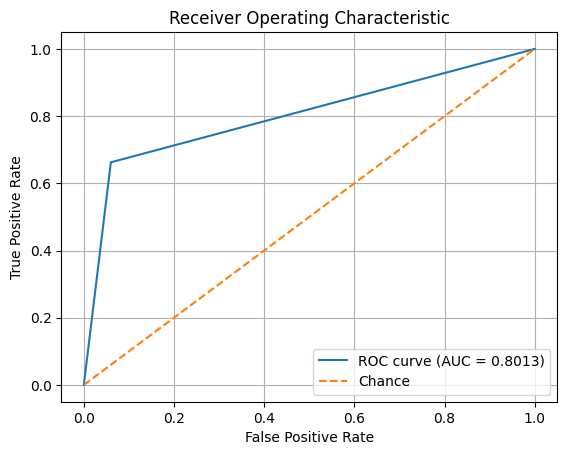

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Assuming you've already split your data into X and y
# X, y = your_data_features, your_labels

# Best hyperparameters from RandomizedSearchCV
best_params = {'learning_rate': np.float64(0.10335257864959599),
               'max_depth': 7,
               'n_estimators': 150}

# Train the model with the best hyperparameters
model = XGBClassifier(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    verbosity=0
)

# Split your dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
evaluation(y_test, y_pred)

# Step 15: Model Comparison
After evaluating all the models, you will compare them based on their performance metrics. The goal is to select the best model that performs well across multiple metrics and generalizes effectively to unseen data.

(Optional) you should apply **statistical tests** (such as **McNemar’s test**) to assess whether differences between model performances are statistically significant. This will help ensure the selection of the optimal model is based on solid evidence.

## Step 17: Conclusion
At the end of this step, you will identify the best-performing model based on the evaluation metrics. You should then decide if further improvements (e.g., feature engineering, model ensembling) are necessary to achieve better results.